In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data_visualize = pd.read_csv("DATE+WEATHER.csv")

data_visualize

,x1,DoY,Solar (W/m2),AirTemp (DegC),RH (%),(delta)PD
0,0.2083,237.2083,0,21.9,97,-0.1
1,0.4583,237.4583,113,22.3,100,-0.1
2,0.6250,237.6250,152,22.8,100,-0.1
3,0.6667,237.6667,141,23.3,100,-0.1
4,0.7083,237.7083,123,23.6,99,-0.1
...,...,...,...,...,...,...
407,40.8750,277.8750,0,14.5,93,-0.1
408,41.0000,278.0000,0,13.9,99,-0.1
409,41.0833,278.0833,0,14.4,100,-0.1
410,41.2083,278.2083,0,14.6,98,-0.1


In [3]:
LEARNING_RATE = 0.0001
TRAINNING_STEP = 100000
DISPLAY_STEP = 10000

X_LABLE = len(data_visualize.columns) - 1

In [4]:
data = np.loadtxt("DATE+WEATHER_np.csv", delimiter = ',', dtype = np.float32)

x = data[:, :X_LABLE]
y = data[:, [-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

w1 = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
w2 = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
bias = tf.Variable(random.random())

In [5]:
def compute_loss():
    hypothesis = tf.matmul(x_train * x_train, w1) + tf.matmul(x_train, w2) + bias
    loss = tf.reduce_mean((y_train - hypothesis) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = LEARNING_RATE)

for step in range(1, TRAINNING_STEP + 1):
    optimizer.minimize(compute_loss, var_list = [w1, w2, bias])
    
    if step % DISPLAY_STEP == 0:
        print('step:', step, '\n', 'w1:\n', w1.numpy(), '\n', 'w2:\n', w2.numpy(), '\n', 
              'bias:', bias.numpy(), '\n', 'loss:', compute_loss().numpy(), '\n')

step: 10000 
 w1:
 [[ 0.02699795]
 [ 0.09057682]
 [-0.01347748]
 [-0.6828359 ]
 [ 0.06409397]] 
 w2:
 [[ 0.21766298]
 [-0.24553727]
 [-0.39434114]
 [ 0.14959428]
 [-0.73714626]] 
 bias: 0.20931372 
 loss: 32309822.0 

step: 20000 
 w1:
 [[-1.3247108e-01]
 [ 1.0077162e-02]
 [ 6.4222701e-04]
 [-6.7281413e-01]
 [-1.3753494e-02]] 
 w2:
 [[ 0.08380121]
 [-0.32064244]
 [-0.34661433]
 [ 0.12296551]
 [-0.8109255 ]] 
 bias: 0.13972954 
 loss: 11476.364 

step: 30000 
 w1:
 [[-2.0966610e-02]
 [ 2.2216171e-03]
 [-7.2995339e-05]
 [-7.1936458e-02]
 [ 3.9135986e-03]] 
 w2:
 [[-0.13962902]
 [-0.30846047]
 [ 0.07076957]
 [ 0.62179154]
 [-0.7684673 ]] 
 bias: 0.17708644 
 loss: 58.25347 

step: 40000 
 w1:
 [[-5.1647024e-03]
 [ 1.5872497e-03]
 [-2.0296682e-06]
 [-1.3961932e-02]
 [ 4.5366446e-03]] 
 w2:
 [[-0.2792851 ]
 [-0.29616946]
 [ 0.00097401]
 [ 0.6753955 ]
 [-0.73787236]] 
 bias: 0.20472291 
 loss: 0.6581011 

step: 50000 
 w1:
 [[-3.8514796e-03]
 [ 1.5746691e-03]
 [-2.2442007e-06]
 [-1.4284657e-

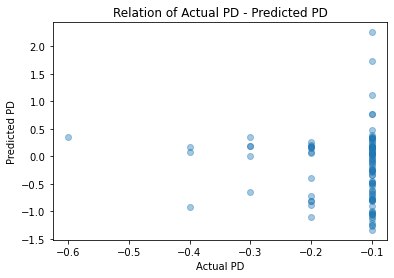

In [6]:
y_hat = tf.matmul(x_test * x_test, w1) + tf.matmul(x_test, w2) + bias

plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [7]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_hat))

RMSE: 0.622996
MAE: 0.49549302
